# Examen del 2do Parcial

1. Utilizando el dataset de _Coactivation_matrix.mat_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

2. Utilizando el dataset de _Coactivation_matrix.mat_:
- Generar el mapa de calor de cada matriz de conectividad
- Generar la distribución de datos de cada matriz de conectividad
- ¿Qué valor se encuentra en el percentil 0.25, 0.5 y 0.75 de la matriz de conectividad?
- Cree los 3 grafos 2D filtrando la matriz de conectividad con los valores dados por los percentiles del ejercicio anterior

3. Utilizando el dataset de _Coactivation_matrix.mat_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot

4. Utilizando el dataset de _chb01_01.edf_:
- Calcule el coeficiente de mundo pequeño
- Calcule las comunidades del grafo
- Calcule los hub
- Calcule la eficiencia global
- Calcule la eficiencia local
- Determine el grado de cada nodo

5. Utilizando el dataset de _chb01_01.edf_:
- Genere el grafo 3D
- Haga que el tamaño de nodos sea proporcional a su grado; es decir, q entre mayor sea su grado, mayor sea el tamaño del nodo ploteado
- Haga que el color de las aristas este relacionado al valor de la matriz de conectividad. Utilizar el map color Hot


In [81]:

import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import networkx.algorithms.smallworld as sw
import networkx.algorithms.community as nx_comm
import mne
from scipy.signal import coherence, hilbert
import mne


In [82]:
matriz=r"C:\Users\admin\OneDrive\Documentos\GitHub\Neurociencias-2026-1\Neurociencias-2026-1\S03_datasets\BCT\Coactivation_matrix.mat"
mat=scipy.io.loadmat(matriz)
coactmat=mat['Coactivation_matrix']
coord=mat['Coord']
array=nx.from_numpy_array(coactmat)
mat


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]], shape=(638, 638)),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.

In [83]:

cluster = nx.average_clustering(array)
largo = nx.average_shortest_path_length(array.subgraph(max(nx.connected_components(array), key=len)))
grafr = nx.gnm_random_graph(array.number_of_nodes(), array.number_of_edges())
cluster2 = nx.average_clustering(grafr)
largo2 = nx.average_shortest_path_length(grafr)
sigma = (cluster / cluster2) / (largo / largo2)

print(f"Mundo pequeño (sigma): {sigma:.3f}")

Mundo pequeño (sigma): 3.652


In [84]:

sorted(nx.degree(array),key=lambda x: x[1],reverse=True)[0:10]

eficiencia=nx.global_efficiency(array)
print(f"Eficiencia General: {eficiencia:.3f}")

eficiencialocal=nx.local_efficiency(array)
print(f"Eficiencia local: {eficiencialocal:.3f}")


grados=dict(nx.degree(array))
grados

comun=nx_comm.louvain_communities(G, weight='weight')
print(f'Numero total de comunidades:{len(comun)},Tamaño de cada comunidad:{[len(i) for i in comun]}')

Eficiencia General: 0.495
Eficiencia local: 0.664
Numero total de comunidades:5,Tamaño de cada comunidad:[186, 112, 144, 53, 143]


---

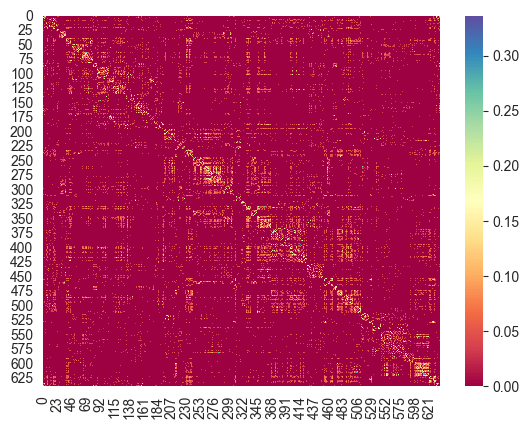

In [85]:
pearson = np.corrcoef(coactmat)
correlacion = pd.DataFrame(pearson)

sns.heatmap(coactmat,annot=False, cmap="Spectral", fmt='2.f')
plt.show()

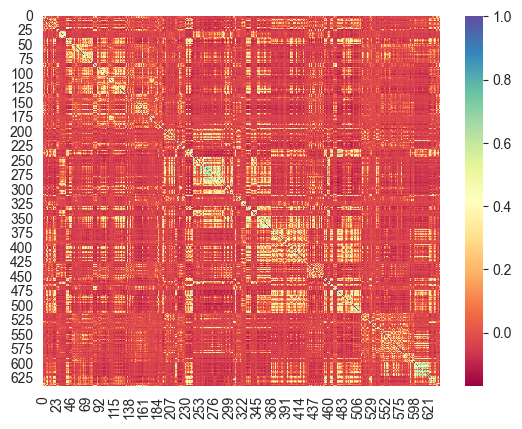

In [86]:
sns.heatmap(correlacion,annot=False, cmap="Spectral", fmt='2.f')
plt.show()

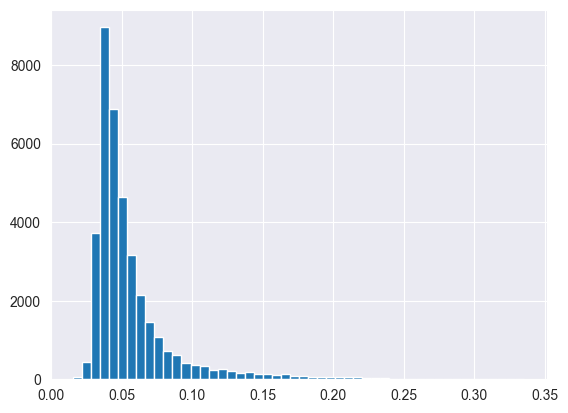

In [28]:
plt.hist(coactmat[coactmat>0].flatten(),bins=50);

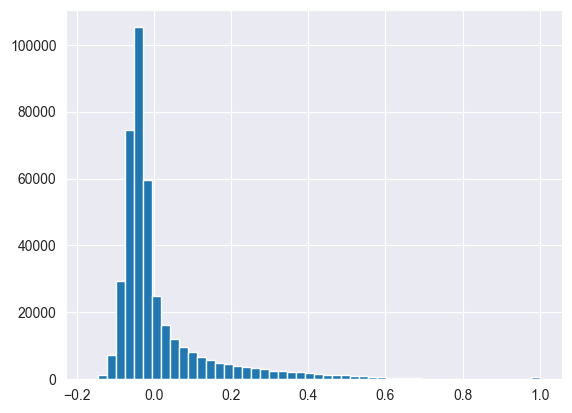

In [29]:
plt.hist(correlacion.to_numpy().flatten(), bins=50);

In [35]:
peruno=np.percentile(coactmat[coactmat>0] ,25)
peruno

np.float64(0.03832752613240418)

In [34]:
perdos=np.percentile(coactmat[coactmat>0] ,50)
perdos

np.float64(0.046052631578947366)

In [33]:
pertres=np.percentile(coactmat[coactmat>0] ,50)
pertres

np.float64(0.046052631578947366)

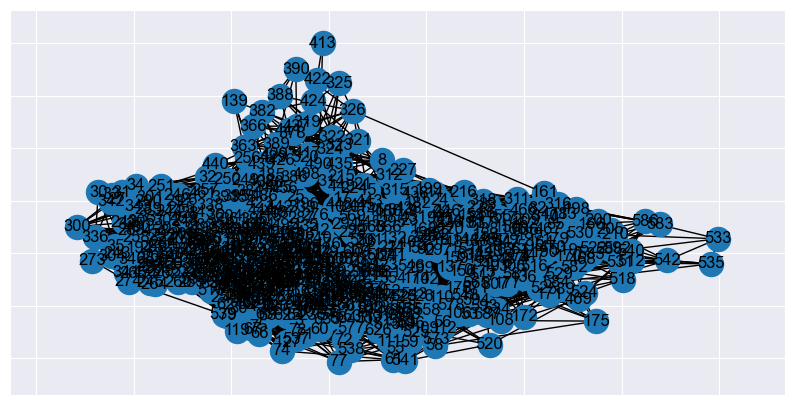

In [37]:
coactmatdf=pd.DataFrame(coactmat)
conect25=coactmatdf>peruno
mat25=np.where(conect25, coactmat,0)
con1=nx.from_numpy_array(mat25)
plt.figure(figsize=(10, 5))
nx.draw_networkx(con1)

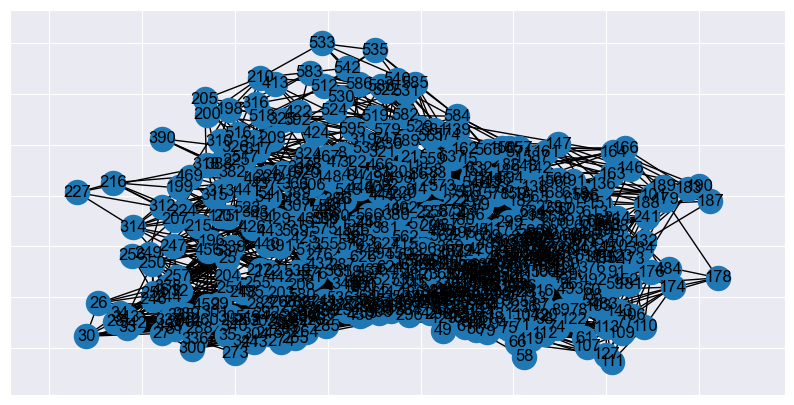

In [38]:
conect5=coactmatdf>perdos
mat5=np.where(conect5, coactmat,0)
con2=nx.from_numpy_array(mat5)
plt.figure(figsize=(10, 5))
nx.draw_networkx(con2)

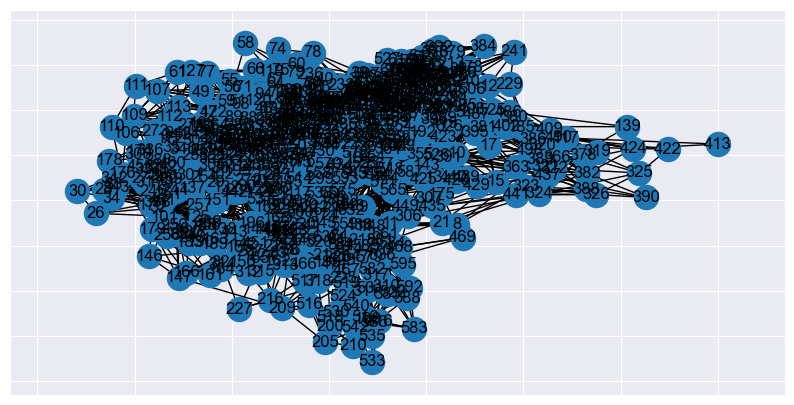

In [39]:
conect75=coactmatdf>pertres
mat75=np.where(conect75, coactmat,0)
con3=nx.from_numpy_array(mat75)
plt.figure(figsize=(10, 5))
nx.draw_networkx(con3)

---

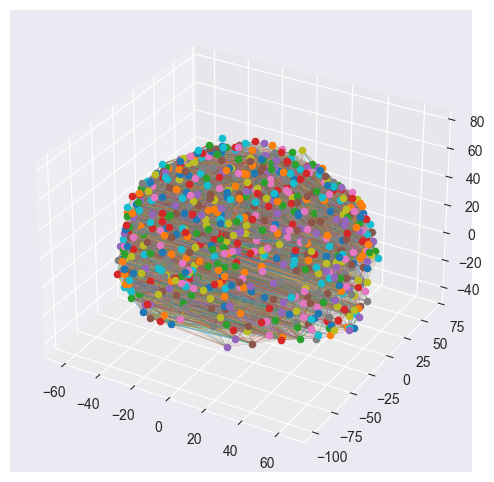

In [45]:
coordinadas=pd.DataFrame(coord, columns=['x', 'y', 'z'])

pos3D={i:(coordinadas.loc[i,'x'],
             coordinadas.loc[i,'y'],
             coordinadas.loc[i,'z']) for i in coordinadas.index}
grafo1 = nx.from_pandas_adjacency(coactmatdf, create_using=nx.Graph());

fig= plt.figure(figsize=(7,7))
ax= fig.add_subplot(111, projection='3d')

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)

for i,j, data in grafo1.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)

plt.show()

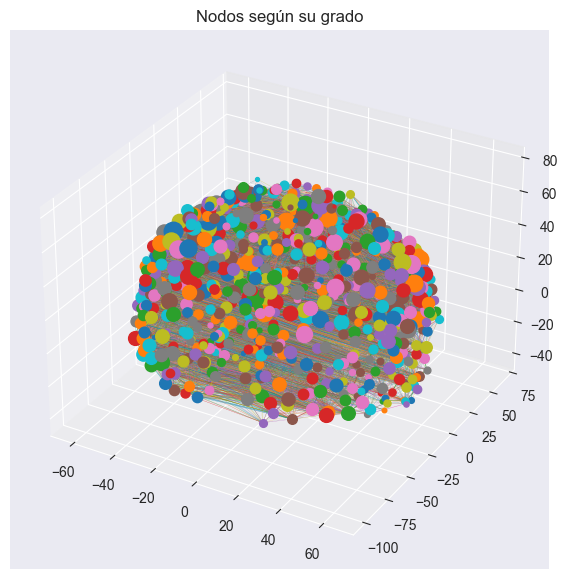

In [41]:
pos3D={i:(coordinadas.loc[i,'x'],
             coordinadas.loc[i,'y'],
             coordinadas.loc[i,'z']) for i in coordinadas.index}
grafo2 = nx.from_pandas_adjacency(coactmatdf, create_using=nx.Graph());

fig= plt.figure(figsize=(7,7))
ax= fig.add_subplot(111, projection='3d')

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z,s=grafo2.degree[i])

for i,j, data in grafo2.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)

ax.set_title('Nodos según su grado')
plt.show()

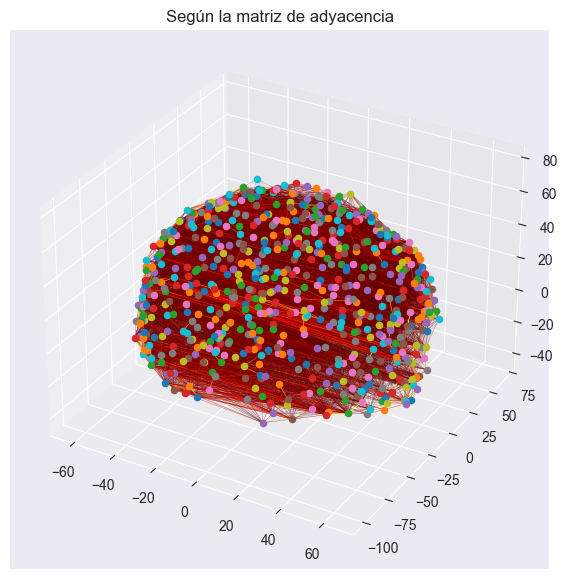

In [46]:

coordinadas=pd.DataFrame(coord, columns=['x', 'y', 'z'])

pos3D={i:(coordinadas.loc[i,'x'],
             coordinadas.loc[i,'y'],
             coordinadas.loc[i,'z']) for i in coordinadas.index}
grafo3 = nx.from_pandas_adjacency(coactmatdf);

fig= plt.figure(figsize=(7,7))
ax= fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('hot')
norm = plt.Normalize(coactmat.min(), coactmat.max())

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)

for i,j, data in grafo3.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2,color=cmap(norm(data['weight'])))

ax.set_title('Según la matriz de adyacencia')
plt.show()

---

In [ ]:
eeg=r"C:\Users\admin\OneDrive\Documentos\GitHub\Neurociencias-2026-1\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf"
sfreq_target=256
fmin,fmax=8,13
raw= mne.io.read_raw_edf(eeg, preload=True)
raw.resample(sfreq_target)
raw.filter(1.,45.,fir_design='firwin')
datos= raw.get_data()
canales = raw.info['ch_names']
numerocanales = len(canales)

In [73]:
coherencia = np.zeros((numerocanales, numerocanales))
for i in range(numerocanales):
    for j in range(numerocanales):
        f, Cxy = coherence(datos[i], datos[j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coherencia[i, j] = np.mean(Cxy[mask])

coher = pd.DataFrame(coherencia, index=canales, columns=canales)
np.fill_diagonal(coher.values, 0)
umbral = np.percentile(coher.values, 75)
umbralcohe = coher.where(coher >= umbral, 0)
adj = nx.from_pandas_adjacency(umbralcohe, create_using=nx.Graph())

cluster3 = nx.average_clustering(adj)
largo3 = nx.average_shortest_path_length(adj.subgraph(max(nx.connected_components(adj), key=len)))
grafr2 = nx.gnm_random_graph(adj.number_of_nodes(), adj.number_of_edges())
cluster4 = nx.average_clustering(grafr2)
largo4 = nx.average_shortest_path_length(grafr2)
sigma = (cluster3 / cluster4) / (largo3 / largo4)

print(f"Mundo pequeño de EEG: {sigma:.3f}")

Mundo pequeño de EEG: 1.874


In [75]:
eficiencia2=nx.global_efficiency(adj)
print(f"Eficiencia general: {eficiencia2:.3f}")
eficiencialocal2=nx.local_efficiency(adj)
print(f"Eficiencia local: {eficiencialocal2:.3f}")
comun2=nx_comm.louvain_communities(adj, weight='weight')
print(f'Numero de comunidades:{len(comun2)},Tamaño de comunidades:{[len(i) for i in comun2]}')
sorted(adj.degree(weight='weight'),key=lambda x: x[1],reverse=True)[0:5]
grados2 = dict(adj.degree(weight='weight'))
grados2

Eficiencia general: 0.570
Eficiencia local: 0.721
Numero de comunidades:4,Tamaño de comunidades:[4, 7, 7, 5]


{'FP1-F7': 1.2568629814696848,
 'F7-T7': 0.858229122919528,
 'T7-P7': 1.4802160857084614,
 'P7-O1': 1.3586196158122892,
 'FP1-F3': 1.2730337422388953,
 'F3-C3': 1.0691035044940798,
 'C3-P3': 1.7580997232952726,
 'P3-O1': 1.0440961064284804,
 'FP2-F4': 1.2020300037511447,
 'F4-C4': 0.886189934346297,
 'C4-P4': 1.5305077766393396,
 'P4-O2': 1.4690359160250173,
 'FP2-F8': 0.9492668958431472,
 'F8-T8': 0.7776601754920138,
 'T8-P8-0': 1.4486594076821455,
 'P8-O2': 1.2927977677899618,
 'FZ-CZ': 0.7698480080007936,
 'CZ-PZ': 1.8547371418411192,
 'P7-T7': 1.4802160857084614,
 'T7-FT9': 0.7804710062015765,
 'FT9-FT10': 0.13788909156485418,
 'FT10-T8': 0.5413354994480178,
 'T8-P8-1': 1.4486594076821457}

In [76]:
cord=r"C:\Users\admin\OneDrive\Documentos\GitHub\Neurociencias-2026-1\Neurociencias-2026-1\S03_datasets\EEG_practica\coordenadas_bipolares_eeg.csv"
coordinadas2=pd.read_csv(cord)
coordinadas2.set_index('canal', inplace=True, drop=True)
coher.columns = [columna.split(sep = ' ')[0] for columna in coher.columns]
coher.index = coher.columns

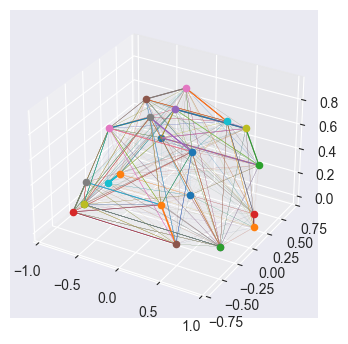

In [77]:
coord2=pd.DataFrame(coordinadas2, columns=['x', 'y', 'z'])

pos3D={canal:(coord2.loc[canal,'x'],
             coord2.loc[canal,'y'],
             coord2.loc[canal,'z']) for canal in coord2.index}
g = nx.from_pandas_adjacency(coher, create_using=nx.DiGraph());

fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)

for i,j, data in g.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)

plt.show()

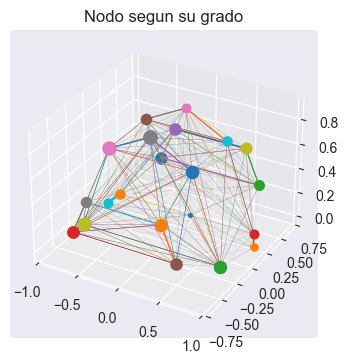

In [80]:
pos3D={canal:(coord2.loc[canal,'x'],
             coord2.loc[canal,'y'],
             coord2.loc[canal,'z']) for canal in coord2.index}
g2 = nx.from_pandas_adjacency(coher, create_using=nx.DiGraph());


fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z,s=grados2[i]*50)

for i,j, data in g2.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*2)

ax.set_title('Nodo segun su grado')
plt.show()

In [ ]:
fig= plt.figure(figsize=(4,4))
ax= fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('hot')
norm = plt.Normalize(coh_df.min().min(), coh_df.max().max())

for i, (x,y,z) in pos3D.items():
    ax.scatter(x,y,z)

for i,j, data in g2.edges(data=True):
    x=[pos3D[i][0],pos3D[j][0]]
    y=[pos3D[i][1],pos3D[j][1]]
    z=[pos3D[i][2],pos3D[j][2]]
    ax.plot(x,y,z,linewidth=data['weight']*10,color=cmap(norm(data['weight'])))

ax.set_title('Aristas segùn matriz')
plt.show()